In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
### lists and dicts to help clear dataframes
#list of columns i want to keep
const_cols = ["Province/State", "Country", "Country/Region", "Date last updated", "Last Update", "Confirmed", "Recovered", "Deaths"]
#dict of column names to change
column_names = {"Country": "Country/Region", "Date last updated": "Last Update"}
#dict of columns and values to put in NaNs
fillna_values = {'Province/State': "", "Country/Region": "", "Confirmed": 0, "Recovered": 0, "Deaths":0}

In [32]:
def read_time_series_csv(url, save, file_name):
    
    df_ts = pd.read_csv(url)
    
    #df_ts = df_ts.dropna(axis=0, how='all')
    #df_ts = df_ts.dropna(axis=1, how='all')

    df_text = df_ts[df_ts.columns[0:2]]
    df_text = df_text.fillna(value = '')
    
    df_val = df_ts[df_ts.columns[2:len(df_ts.columns)]]
    df_val = df_val.fillna(value = 0)
    
    df_ts = pd.concat([df_text,df_val],axis=1)
    
    if save == True:
        writer = pd.ExcelWriter(file_name, engine='xlsxwriter')

        df_ts.to_excel(writer, index=False)

        writer.save()

    return df_ts

In [33]:
url_confirmed = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/time_series/time_series_2019-ncov-Confirmed.csv"
url_deaths = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/time_series/time_series_2019-ncov-Deaths.csv"
url_recovered = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/time_series/time_series_2019-ncov-Recovered.csv"

In [35]:
df_confirmed = read_time_series_csv(url_confirmed, True, "COVID19-Confirmed.xlsx")
df_deaths = read_time_series_csv(url_deaths, True, "COVID19-Deaths.xlsx")
df_recovered = read_time_series_csv(url_recovered, True, "COVID19-Recovered.xlsx")

In [14]:
print("Shape of dataframe: {}".format(ts_df_list[0].shape))
#printing whole df
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     print(ts_df_list[0])

Shape of dataframe: (4, 1)


In [15]:
#confirmed time series df
#time_series_df_list[0]

In [18]:
#
china_confirmed_series = ts_df_list[1][ts_df_list[1]['Country/Region']=="Mainland China"].iloc[:,5:].sum(axis=0)
china_recovered_series = ts_df_list[2][ts_df_list[2]['Country/Region']=="Mainland China"].iloc[:,5:].sum(axis=0)
china_deaths_series = ts_df_list[3][ts_df_list[3]['Country/Region']=="Mainland China"].iloc[:,5:].sum(axis=0)
#print(china_confirmed_series)
#print(china_recovered_series)
#print(china_deaths_series)

In [19]:
dates_0 = china_confirmed_series.index.values
dates_1 = china_recovered_series.index.values
dates_2 = china_deaths_series.index.values

print(dates_0)
#print(dates_1)
#print(dates_2)

dates_datetime_0 = pd.to_datetime(dates_0, infer_datetime_format=True)
dates_datetime_1 = pd.to_datetime(dates_1, infer_datetime_format=True)
dates_datetime_2 = pd.to_datetime(dates_2, infer_datetime_format=True)

print(dates_datetime_0)


['1/22/2020 12:00 PM' '1/23/2020 12:00 PM' '1/24/2020 12:00 AM'
 '1/24/2020 12:00 PM' '1/25/2020 12:00 AM' '1/25/2020 12:00 PM'
 '1/25/2020 10:00 PM' '1/26/2020 11:00 AM' '1/26/2020 11:00 PM'
 '1/27/2020 9:00 AM' '1/27/2020 7:00 PM' '1/27/2020 8:30 PM'
 '1/28/2020 1:00 PM' '1/28/2020 6:00 PM' '1/28/2020 11:00 PM'
 '1/29/2020 1:30 PM' '1/29/2020 2:30 PM' '1/29/2020 9:00 PM'
 '1/30/2020 11:00 AM' '1/31/2020 2:00 PM' '2/1/2020 10:00 AM'
 '2/2/2020 9:00 PM' '2/3/2020 9:00 PM' '2/4/2020 9:40 AM'
 '2/4/2020 10:00 PM' '2/5/2020 9:00 AM' '2/5/2020 11:00 PM'
 '2/6/2020 9:00 AM' '2/6/2020 2:20 PM' '2/7/2020 8:13 PM'
 '2/7/2020 10:50 PM' '2/8/2020 10:04 PM' '2/8/20 23:04'
 '02/09/2020 10:30 AM' '2/9/20 23:20' '2/10/2020 11:00 AM']
DatetimeIndex(['2020-01-22 12:00:00', '2020-01-23 12:00:00',
               '2020-01-24 00:00:00', '2020-01-24 12:00:00',
               '2020-01-25 00:00:00', '2020-01-25 12:00:00',
               '2020-01-25 22:00:00', '2020-01-26 11:00:00',
               '2020-01-26

In [20]:
#something for converting datetime for x axis
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

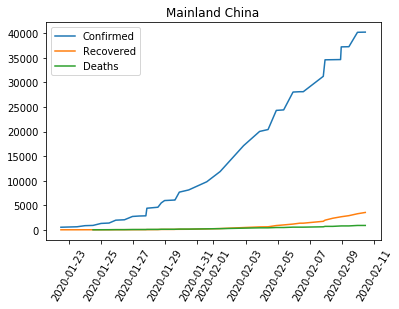

In [31]:
plt.plot(dates_datetime_0, china_confirmed_series, dates_datetime_1, china_recovered_series, dates_datetime_2, china_deaths_series)
plt.xticks(rotation=60)
plt.legend(['Confirmed', 'Recovered', 'Deaths'])
plt.title("Mainland China")
plt.savefig("img/china.png",bbox_inches='tight')

In [23]:
countries_ts = ts_df_list[1]['Country/Region'].unique()
print(len(countries_ts))
print(countries_ts)

29
['Mainland China' 'Thailand' 'Japan' 'South Korea' 'Taiwan' 'US' 'Macau'
 'Hong Kong' 'Singapore' 'Vietnam' 'France' 'Nepal' 'Malaysia' 'Canada'
 'Australia' 'Cambodia' 'Sri Lanka' 'Germany' 'Finland'
 'United Arab Emirates' 'Philippines' 'India' 'Italy' 'UK' 'Russia'
 'Sweden' 'Spain' 'Belgium' 'Others']


In [24]:
#for country in countries_ts:
    #plt.plot(dates_datetime, ts_df_list[0][ts_df_list[0]['Country/Region']==country].iloc[:,5:].sum(axis=0))
    #plt.show()

In [25]:
#math for using floor
import math

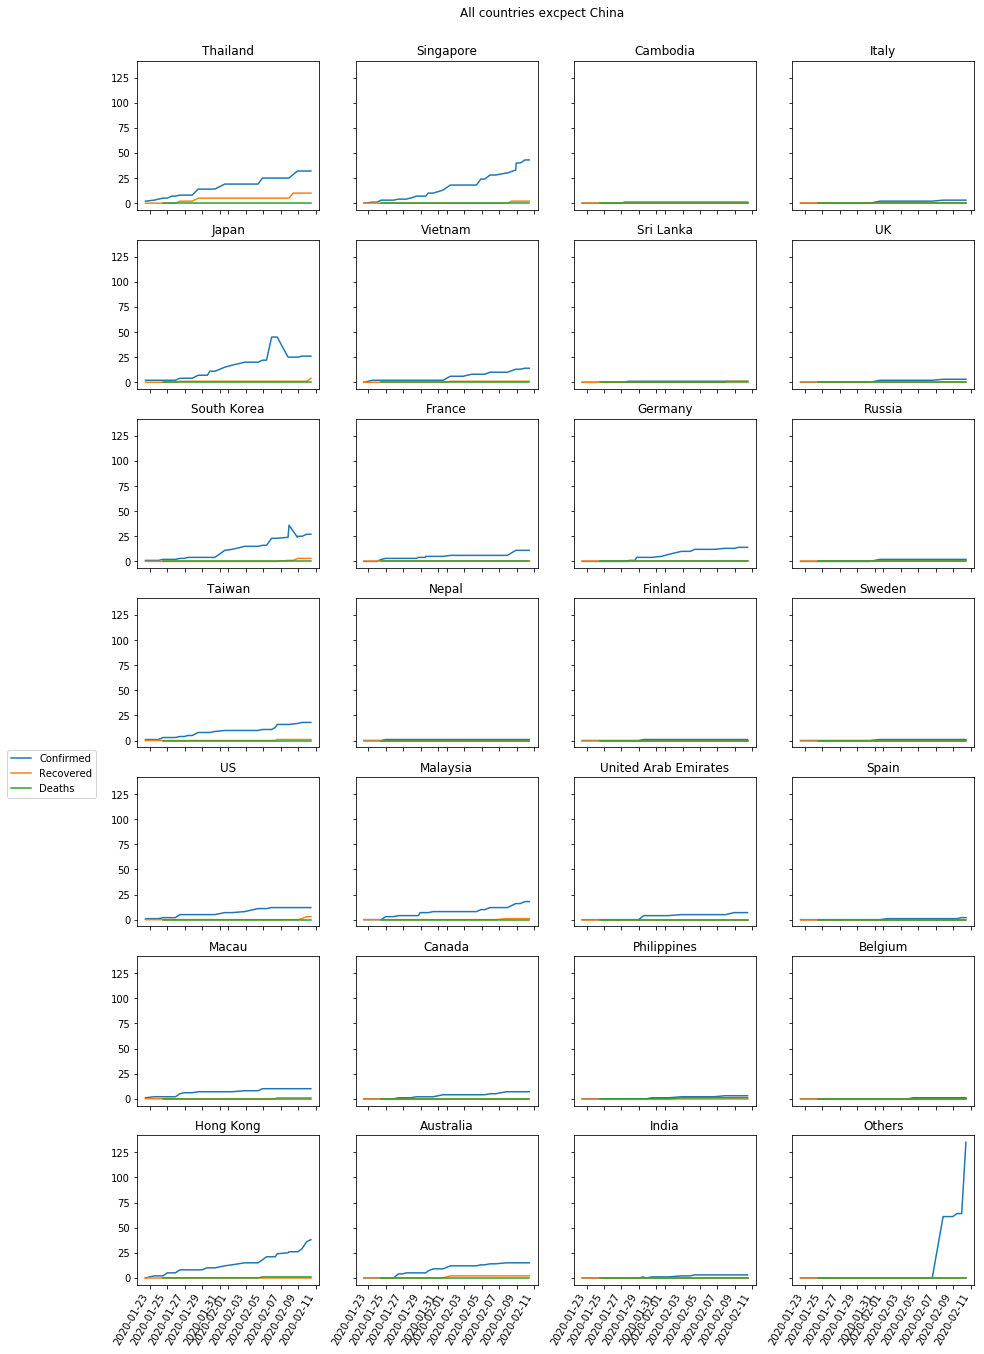

In [32]:
country_confirmed_series = ts_df_list[1][ts_df_list[1]['Country/Region']==countries_ts[0]].iloc[:,5:].sum(axis=0)
country_recovered_series = ts_df_list[2][ts_df_list[2]['Country/Region']==countries_ts[0]].iloc[:,5:].sum(axis=0)
country_deaths_series = ts_df_list[3][ts_df_list[3]['Country/Region']==countries_ts[0]].iloc[:,5:].sum(axis=0)
dates_0 = country_confirmed_series.index.values
dates_datetime_0 = pd.to_datetime(dates_0, infer_datetime_format=True)
dates_1 = country_recovered_series.index.values
dates_datetime_1 = pd.to_datetime(dates_1, infer_datetime_format=True)
dates_2 = country_deaths_series.index.values
dates_datetime_2 = pd.to_datetime(dates_2, infer_datetime_format=True)
    
plots_in_row = 4
#define how many rows on how many countries in list without china
plots_in_col = math.floor((len(countries_ts)-1)/plots_in_row)

fig, axs = plt.subplots(plots_in_col, plots_in_row, figsize=(15, 25), sharey=True, sharex=True)
fig.autofmt_xdate(rotation=60)

axs0 = axs.shape[0]
axs1 = axs.shape[1]

i = 0
j = 0

for country in countries_ts[1:]:
    
    axs[i][j].plot(dates_datetime_0,ts_df_list[1][ts_df_list[1]['Country/Region']==country].iloc[:,5:].sum(axis=0))
    axs[i][j].plot(dates_datetime_1,ts_df_list[2][ts_df_list[2]['Country/Region']==country].iloc[:,5:].sum(axis=0))
    axs[i][j].plot(dates_datetime_2,ts_df_list[3][ts_df_list[3]['Country/Region']==country].iloc[:,5:].sum(axis=0))
    axs[i][j].set_title(country)
    #axs[i][j].set_xticklabels(rotation=90)
    i = i + 1
    if i==plots_in_col:
        i = 0
        j = j + 1
        if j==plots_in_row:
            j = 0
fig.suptitle('All countries excpect China',y=0.91)
fig.legend(['Confirmed', 'Recovered', 'Deaths'],loc='upper left', bbox_to_anchor=(0., 0., 0.5, 0.5),bbox_transform=plt.gcf().transFigure)
plt.savefig("img/rest.png",bbox_inches='tight')

In [29]:
#dates_datetime_0.to_pydatetime()

In [30]:
#group by day and take max value
#dates_datetime_0 = dates_datetime_0.to_pydatetime()
#print(pd.Series(dates_datetime_0).resample('D'))